# 1. Introduction

** What am I trying to do?** <br>
I am trying to use this dataset to see if I can train a binary classifier which can predict if a patient has diabetes or not using the medical attributes provided

** Assumptions **
1. That this is enough data to split and reliably predict if the patient has diabetes
2. that just these attributes are enough to diagnose the ailment to begin with

** Similar Problems ** <br> 
This is very much like some common 2 class classification problems like classifying mail into spam and ham based on the contents of the email. Obviously the attributes there would be strings and not numbers like this dataset, therefore the way in which we process at least some of the features will be different.

** Why am I solving this problem and what do I want the next steps to be? **
1. I am a beginner at data science & ML, I want to use this problem to learn more about 2 class classification algorithms and how they work
2. I hope to use this as a way to get a better understanding of the various 2 class classification algorithms
3. ***Most Importantly*** I want to get some valuable feedback on how I have tried to solve the problem and how it can be improved

So lets get started...


In [1]:
# Importing required libraries to get started
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

# 2. Data Exploration

Lets pull in the data and see what's in it, Here is what we already know about this data <br>

## 2.1 Data Overview

<br>
** Columns **
1. pregnancies - Number of times pregnant 
2. Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. BloodPressure - Diastolic blood pressure (mm Hg) 
4. SkinThickness - Triceps skin fold thickness (mm) 
5. Insulin - 2-Hour serum insulin (mu U/ml) 
6. BMI - Body mass index (weight in kg/(height in m)^2) 
7. DiabetesPedigreeFunction - Diabetes pedigree function 
8. Age - Age (years) 
9. Outcome - Class variable (0 or 1) class value 1 is interpreted as "tested positive for
   diabetes
   
**Class distribution:** <br>
0 : 500 <br>
1 :  268 <br>

**Data characteristics:**
* The database contains only data about **female** patients who are of **Pima Indian heritage** are **21 or older**
* All the attributes are numeric
* The data may contain invalid or null values
* Total number of cases presented are 786

In [2]:
data = pd.read_csv('../input/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2.2 Invalid data
Based on the description above, Plasma glucose levels, blood pressure, skin thickness, insulin and BMI all have min values at 0 which does not pass the smoke test, especially blood pressure, since the diastolic blood pressure most likely cannot be 0 for a living person, I think.

1. Blood Pressure: <br>
Based on the information provided for [blood pressure in adults on wikipedia](https://en.wikipedia.org/wiki/Blood_pressure#Classification), any diastolic blood pressure under 60 is considered hypotension. Browsing more on this subject there are cases where the diastolic bp is read even lower while not exhibiting signs of hypotension but that's mostly rare. the distolic blood pressure can be low in case the person is sleeping too.
**Assuming** these are normal healthy women who are currently not suffering from hypotension or in the ER and they are awake at the time of the data collection, the 0 values are clearly invalid. Lets find out how many cases we have of this

In [4]:
print(data[data.BloodPressure == 0].shape[0])
print(data[data.BloodPressure == 0].index.tolist())
print(data[data.BloodPressure == 0].groupby('Outcome')['Age'].count())

35
[7, 15, 49, 60, 78, 81, 172, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 589, 601, 604, 619, 643, 697, 703, 706]
Outcome
0    19
1    16
Name: Age, dtype: int64


2.Plasma glucose levels: <br>
the range is normally 3.9 to 7.2 for non-diabetic patients even after eating. Given this, the 0s here are not valid either. Number of cases of this:

In [5]:
print(data[data.Glucose == 0].shape[0])
print(data[data.Glucose == 0].index.tolist())
print(data[data.Glucose == 0].groupby('Outcome')['Age'].count())

5
[75, 182, 342, 349, 502]
Outcome
0    3
1    2
Name: Age, dtype: int64


3.Skin Fold Thickness: <br>
    for normal healthy adults the skin fold thinkness is not less than 10mm even for girls [[source]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5083983/)

In [6]:
print(data[data.SkinThickness == 0].shape[0])
print(data[data.SkinThickness == 0].index.tolist())
print(data[data.SkinThickness == 0].groupby('Outcome')['Age'].count())

227
[2, 5, 7, 9, 10, 11, 12, 15, 17, 21, 22, 26, 29, 33, 36, 41, 44, 46, 49, 58, 60, 61, 62, 64, 67, 72, 76, 78, 81, 84, 90, 93, 100, 101, 102, 104, 106, 113, 115, 116, 117, 123, 124, 129, 131, 138, 140, 143, 148, 151, 154, 164, 167, 168, 170, 176, 178, 179, 180, 183, 184, 190, 192, 193, 196, 201, 207, 219, 221, 222, 226, 230, 233, 235, 239, 242, 246, 250, 251, 261, 264, 266, 268, 269, 272, 274, 278, 280, 283, 284, 294, 299, 300, 303, 304, 317, 319, 327, 332, 333, 336, 337, 339, 343, 344, 347, 350, 351, 354, 355, 361, 363, 366, 378, 391, 394, 398, 400, 401, 404, 406, 407, 408, 418, 426, 430, 433, 435, 437, 439, 443, 451, 453, 456, 461, 464, 468, 473, 474, 484, 489, 494, 495, 496, 505, 509, 512, 513, 517, 518, 522, 523, 524, 529, 531, 533, 535, 536, 537, 552, 557, 559, 560, 564, 570, 571, 577, 578, 583, 586, 587, 589, 592, 596, 598, 601, 604, 615, 616, 619, 622, 624, 626, 627, 628, 630, 632, 634, 635, 636, 641, 642, 643, 653, 658, 660, 674, 675, 676, 677, 678, 683, 684, 686, 690, 691, 6

4.BMI: <br>
Based on WebMD data BMI among adults range from 18.5 to 30.0 or higher. Assuming none of these women are extremely short or extremely underweight the BMI should not be 0 or close to 0 [[Source]](https://www.webmd.com/a-to-z-guides/body-mass-index-bmi-for-adults)

In [7]:
print(data[data.BMI == 0].shape[0])
print(data[data.BMI == 0].index.tolist())
print(data[data.BMI == 0].groupby('Outcome')['Age'].count())

11
[9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706]
Outcome
0    9
1    2
Name: Age, dtype: int64


5.Insulin:
ok so turns out in some rare cases a person can have zero insulin but they almost definitely have diabetes, which doesn't seem to be the case as per the data since 236 cases have insulin value 0 but do not have diabetes

In [8]:
print(data[data.Insulin == 0].shape[0])
print(data[data.Insulin == 0].index.tolist())
print(data[data.Insulin == 0].groupby('Outcome')['Age'].count())

374
[0, 1, 2, 5, 7, 9, 10, 11, 12, 15, 17, 21, 22, 23, 26, 29, 30, 33, 34, 36, 37, 38, 41, 42, 44, 45, 46, 47, 48, 49, 55, 58, 60, 61, 62, 64, 65, 66, 67, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 89, 90, 93, 96, 100, 101, 102, 104, 106, 113, 115, 116, 117, 118, 121, 123, 124, 129, 131, 133, 138, 140, 141, 143, 145, 146, 148, 149, 151, 154, 155, 160, 163, 164, 166, 167, 168, 170, 172, 176, 178, 179, 180, 183, 184, 185, 190, 192, 193, 194, 196, 200, 201, 202, 205, 207, 209, 210, 211, 212, 218, 219, 221, 222, 226, 227, 230, 233, 235, 237, 238, 239, 240, 242, 245, 246, 249, 250, 251, 253, 255, 256, 257, 261, 262, 263, 264, 266, 267, 268, 269, 270, 272, 274, 276, 278, 280, 283, 284, 294, 299, 300, 303, 304, 310, 314, 317, 319, 321, 322, 324, 327, 330, 332, 333, 336, 337, 339, 342, 343, 344, 347, 349, 350, 351, 352, 354, 355, 357, 361, 362, 363, 366, 367, 378, 381, 386, 387, 391, 394, 397, 398, 399, 400, 401, 403, 404, 406, 407, 408, 410, 416, 417, 418, 423, 426, 430, 433, 434, 435, 4

There are a couple of ways I can handle these invalid data values:

1. Ignore/remove these casses - this may not work especially with something like skin thickness which has 227 such data points, removing those would leave me with very little data in an already small dataset. This may work for bmi and glucose invalid data points
2. put average/mean values - this may not work out in all cases either, e.g. blood pressure, the blood pressure may be correlated to the diabetes
3. not using those features for the classification algorthm - this may work, perhaps in the case of skin thickness.

Lets also visualize these features to see how the Outcome is related to them

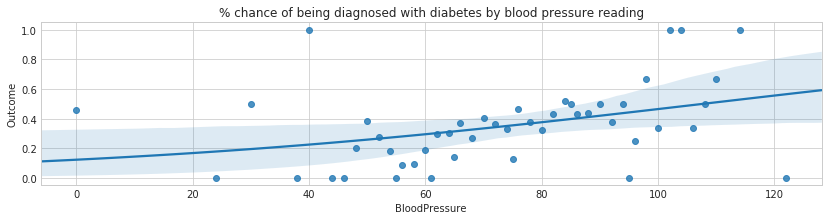

No handles with labels found to put in legend.


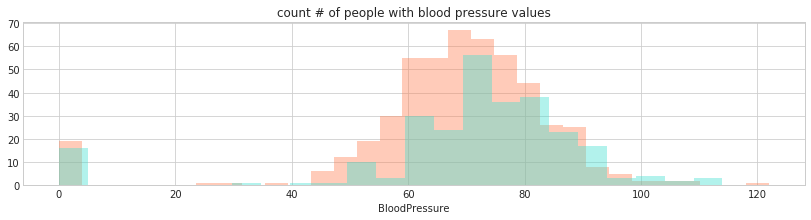

In [25]:
plt.figure(figsize=(14,3))
bp_pivot = data.groupby('BloodPressure').Outcome.mean().reset_index()
sns.regplot(bp_pivot.BloodPressure, bp_pivot.Outcome, logistic=True)
plt.title('% chance of being diagnosed with diabetes by blood pressure reading')
plt.show()

plt.figure(figsize=(14,3))
bp_pivot = data.groupby('BloodPressure').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['BloodPressure'], color='coral', kde=False)
sns.distplot(data[data.Outcome == 1]['BloodPressure'], color='turquoise', kde=False)
plt.legend()
plt.title('count # of people with blood pressure values')
plt.show()

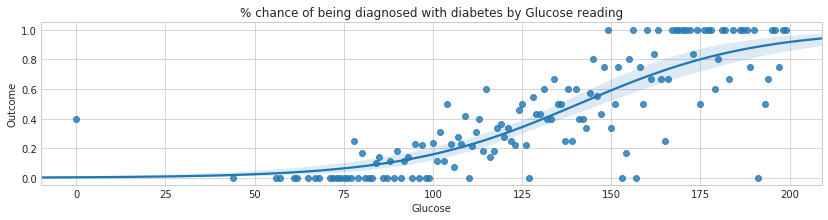

No handles with labels found to put in legend.


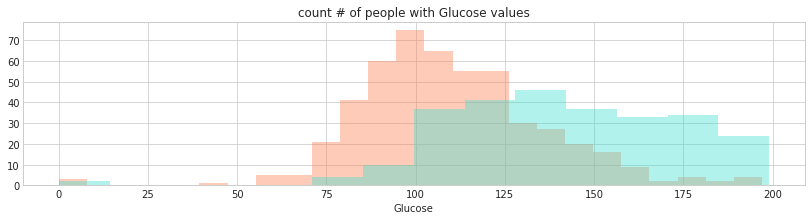

In [31]:
plt.figure(figsize=(14,3))
glucose_pivot = data.groupby('Glucose').Outcome.mean().reset_index()
sns.regplot(glucose_pivot.Glucose, glucose_pivot.Outcome, logistic=True)
plt.title('% chance of being diagnosed with diabetes by Glucose reading')
plt.show()

plt.figure(figsize=(14,3))
glucose_pivot = data.groupby('Glucose').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['Glucose'], color='coral', kde=False)
sns.distplot(data[data.Outcome == 1]['Glucose'], color='turquoise', kde=False)
plt.legend()
plt.title('count # of people with Glucose values')
plt.show()

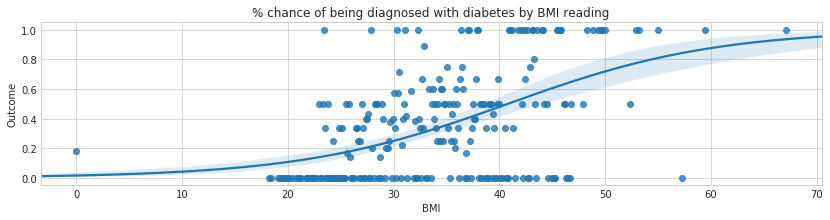

No handles with labels found to put in legend.


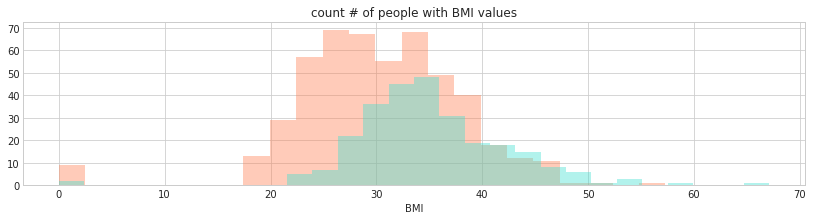

In [34]:
plt.figure(figsize=(14,3))
BMI_pivot = data.groupby('BMI').Outcome.mean().reset_index()
sns.regplot(BMI_pivot.BMI, BMI_pivot.Outcome, logistic=True)
plt.title('% chance of being diagnosed with diabetes by BMI reading')
plt.show()

plt.figure(figsize=(14,3))
BMI_pivot = data.groupby('BMI').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['BMI'], color='coral', kde=False)
sns.distplot(data[data.Outcome == 1]['BMI'], color='turquoise', kde=False)
plt.legend()
plt.title('count # of people with BMI values')
plt.show()

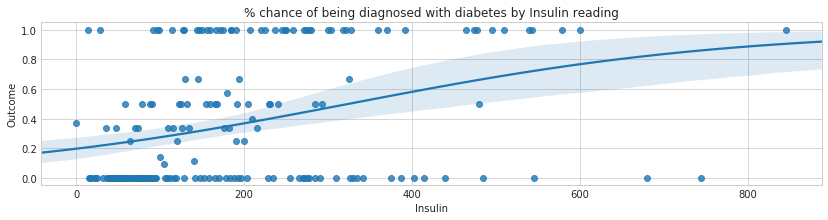

No handles with labels found to put in legend.


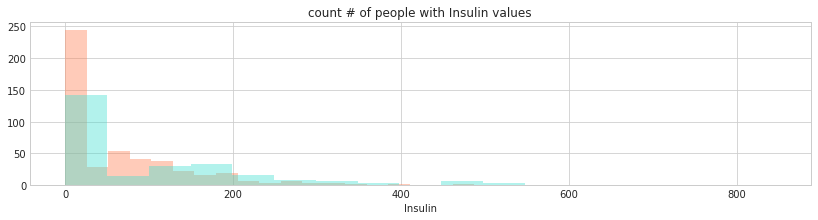

In [32]:
plt.figure(figsize=(14,3))
Insulin_pivot = data.groupby('Insulin').Outcome.mean().reset_index()
sns.regplot(Insulin_pivot.Insulin, Insulin_pivot.Outcome, logistic=True)
plt.title('% chance of being diagnosed with diabetes by Insulin reading')
plt.show()

plt.figure(figsize=(14,3))
Insulin_pivot = data.groupby('Insulin').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['Insulin'], color='coral', kde=False)
sns.distplot(data[data.Outcome == 1]['Insulin'], color='turquoise', kde=False)
plt.legend()
plt.title('count # of people with Insulin values')
plt.show()

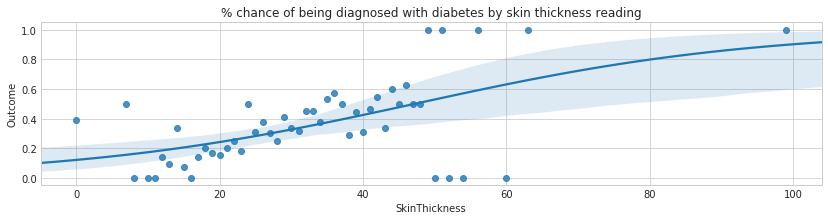

No handles with labels found to put in legend.


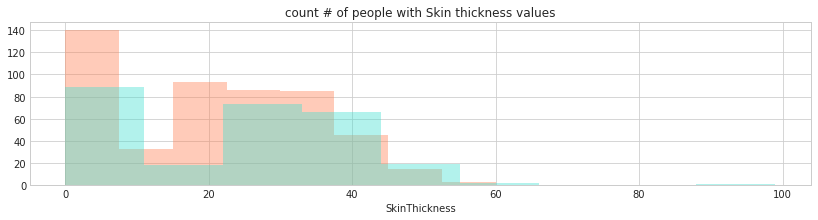

In [30]:
plt.figure(figsize=(14,3))
SkinThickness_pivot = data.groupby('SkinThickness').Outcome.mean().reset_index()
sns.regplot(SkinThickness_pivot.SkinThickness, SkinThickness_pivot.Outcome, logistic=True)
plt.title('% chance of being diagnosed with diabetes by skin thickness reading')
plt.show()

plt.figure(figsize=(14,3))
SkinThickness_pivot = data.groupby('SkinThickness').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['SkinThickness'], color='coral', kde=False)
sns.distplot(data[data.Outcome == 1]['SkinThickness'], color='turquoise', kde=False)
plt.legend()
plt.title('count # of people with Skin thickness values')
plt.show()